# 2-D Ising Model

We will investigate the 2-d Ising model with Monte Carlo methods. Since there are many internal iterations, it is much faster to run in `C++` with `swig`. 

### Compile with swig

In [23]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

### Import from swig

In [24]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt

### Initialize the system

In [35]:
L = 100 # number of spins per side (square)
J = 1.0 # coupling between spins
Nskip = L**2 # flip Nskip spins per step, should be at least the number of spins
H = 0.0 # external magnetic field
MCSteps = 20000 # Total number of samples to draw


### Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

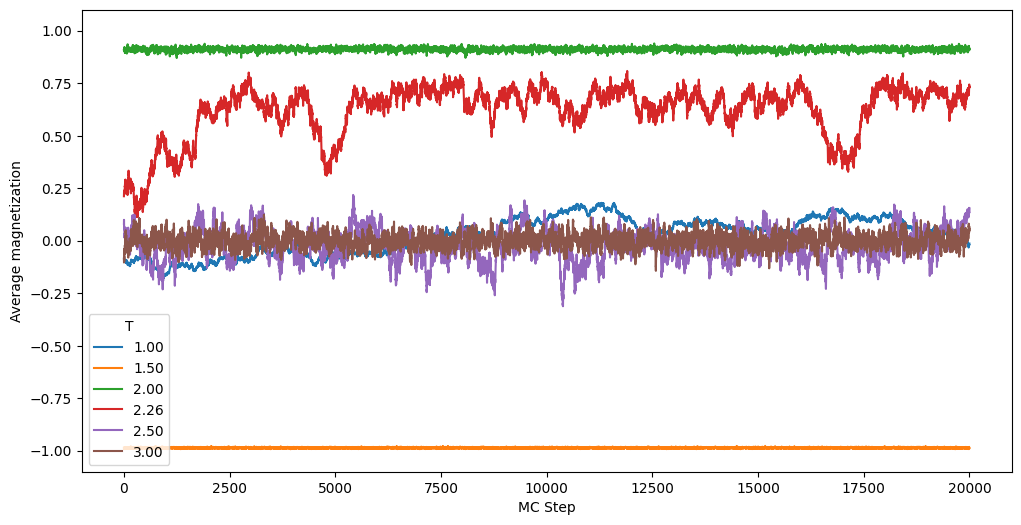

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

E_avg_vals = []
m_avg_vals = []
T_vals = [1.0, 1.5, 2.0, 2.26, 2.5, 3.0]
for T in T_vals:
    i = ising.Ising(J, L, Nskip, T, H)
    i.thermalize(int(MCSteps * 0.2))
    i.run(MCSteps)
    mvals = i.get_m_vals()
    ax.plot(mvals, label=f"{T:3.2f}")
    E_avg_vals.append(i.get_eAvg())
    m_avg_vals.append(i.get_mAvg())

ax.legend(title="T")
#ax.set_xlim(-100, 2000)
ax.set_ylim(-1.1,1.1)
ax.set_xlabel("MC Step")
ax.set_ylabel("Average magnetization")
plt.show()

### Plot average magnetization versus temperature

Text(0, 0.5, 'Average Magnetization')

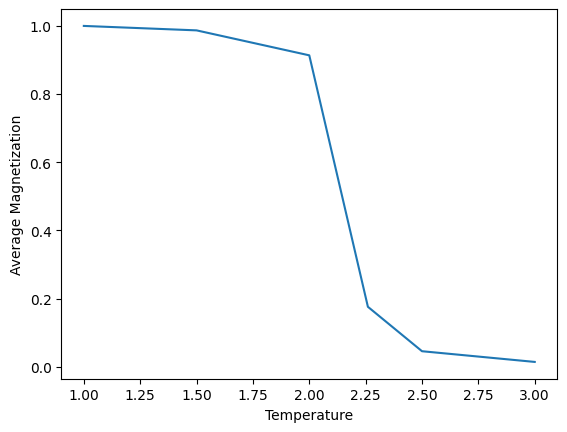

In [30]:
plt.plot(T_vals, np.abs(m_avg_vals))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")